# 서울시 초등학교 통계
데이터 링크 : https://data.seoul.go.kr/dataList/201/S/2/datasetView.do

In [ ]:
!!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/일일 데이터 분석/

Mounted at /content/drive
/content/drive/MyDrive/일일 데이터 분석


In [43]:
import pandas as pd
import numpy as np
import datetime
import re

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

In [22]:
df = pd.read_csv('./서울시 초등학교 통계.csv')

In [26]:
def preprocessing(dataframe):
  col_list = ['자치구별(1)','자치구별(2)']
  df = dataframe.copy()

  for col in df.columns[2:]:
    if '.' in col:
      col = col.replace('.',',')
      col_list.append(re.split(',',col)[0])
    else:
      col_list.append(col)
  
  df = pd.concat([pd.DataFrame([col_list],columns=df.columns),df]).reset_index().iloc[:,1:]

  df = df.T
  df.columns = df.loc['자치구별(2)']
  df = df.iloc[2:,:].reset_index(drop=True)
  df.columns = ['년','구분1','구분2','구분3'] + list(df.columns[4:])

  return df

In [27]:
data = preprocessing(df)

In [29]:
data

,년,구분1,구분2,구분3,소계,종로구,중구,용산구,성동구,광진구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2000,학교수 (개),소계,소계,532,14,12,15,15,20,...,32,20,16,20,18,19,20,30,33,24
1,2000,학급수 (개),소계,소계,20363,354,342,407,635,768,...,1149,811,603,798,766,866,640,976,1388,1075
2,2000,학생수 (명),소계,소계,759443,11671,11693,13763,23648,29926,...,44075,29761,22033,29107,28694,32532,22687,35151,51456,40187
3,2000,학생수 (명),남자,소계,400953,6148,6083,7247,12388,15729,...,23183,15699,11635,15443,15156,17191,12068,18907,27262,21512
4,2000,학생수 (명),여자,소계,358490,5523,5610,6516,11260,14197,...,20892,14062,10398,13664,13538,15341,10619,16244,24194,18675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021,입학자수 (명),남자,소계,32564,375,412,561,976,1118,...,1959,1413,668,1276,1309,1120,1755,1890,2610,1940
381,2021,입학자수 (명),여자,소계,31126,397,405,538,910,1028,...,2046,1386,646,1124,1216,1054,1658,1728,2412,1823
382,2021,교지면적 (천㎡),소계,소계,7158,99,125,194,195,214,...,410,327,200,300,260,279,304,413,457,346
383,2021,건물면적 (천㎡),소계,소계,6034,100,97,117,236,206,...,353,266,166,226,218,237,222,362,394,261


In [33]:
print('c : ',list(data.columns))
print('r : ',data['구분1'].unique())

c :  ['년', '구분1', '구분2', '구분3', '소계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']
r :  ['학교수 (개)' '학급수 (개)' '학생수 (명)' '교원수 (명)' '직원수 (명)' '졸업자현황 (명)' '교지면적 (천㎡)'
 '건물면적 (천㎡)' '교실수 (개)' '입학자수 (명)']


In [34]:
data['구분1'].value_counts()

학생수 (명)      66
교원수 (명)      66
직원수 (명)      66
졸업자현황 (명)    56
학교수 (개)      22
학급수 (개)      22
교지면적 (천㎡)    22
건물면적 (천㎡)    22
교실수 (개)      22
입학자수 (명)     21
Name: 구분1, dtype: int64

In [39]:
# 2000년부터 2021년까지 초등학교 통계 자료
data['년'].unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'], dtype=object)

In [35]:
# 입학자수는 2013년부터 존재
# 2013,2014,2015년은 소계만 수집되었으며, 2016부터 남자,여자,소계로 데이터 수집
data[data['구분1'] == '입학자수 (명)']

,년,구분1,구분2,구분3,소계,종로구,중구,용산구,성동구,광진구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
221,2013,입학자수 (명),소계,소계,74125,980,949,1408,2214,2693,...,4424,3363,1661,2668,3014,3033,3552,3346,5202,3600
238,2014,입학자수 (명),소계,소계,79656,1052,1090,1593,2404,2819,...,4814,3674,1718,2854,3181,3230,3832,3856,5712,3804
255,2015,입학자수 (명),소계,소계,75258,979,978,1417,2150,2606,...,4766,3494,1550,2589,2908,3015,3949,3987,5201,3679
274,2016,입학자수 (명),소계,소계,69944,875,882,1285,1995,2434,...,4420,3330,1514,2401,2813,2733,3661,3709,5079,3237
275,2016,입학자수 (명),남자,소계,35772,455,443,657,1008,1257,...,2295,1690,778,1216,1423,1422,1862,1897,2604,1648
276,2016,입학자수 (명),여자,소계,34172,420,439,628,987,1177,...,2125,1640,736,1185,1390,1311,1799,1812,2475,1589
295,2017,입학자수 (명),소계,소계,72529,927,858,1250,2105,2560,...,4541,3469,1612,2369,2957,2779,4038,3953,5301,3411
296,2017,입학자수 (명),남자,소계,37206,461,444,630,1091,1360,...,2358,1765,831,1177,1564,1415,2068,2062,2699,1752
297,2017,입학자수 (명),여자,소계,35323,466,414,620,1014,1200,...,2183,1704,781,1192,1393,1364,1970,1891,2602,1659
316,2018,입학자수 (명),소계,소계,70686,861,897,1225,2109,2494,...,4826,3327,1566,2448,2811,2695,3863,3970,5221,3228


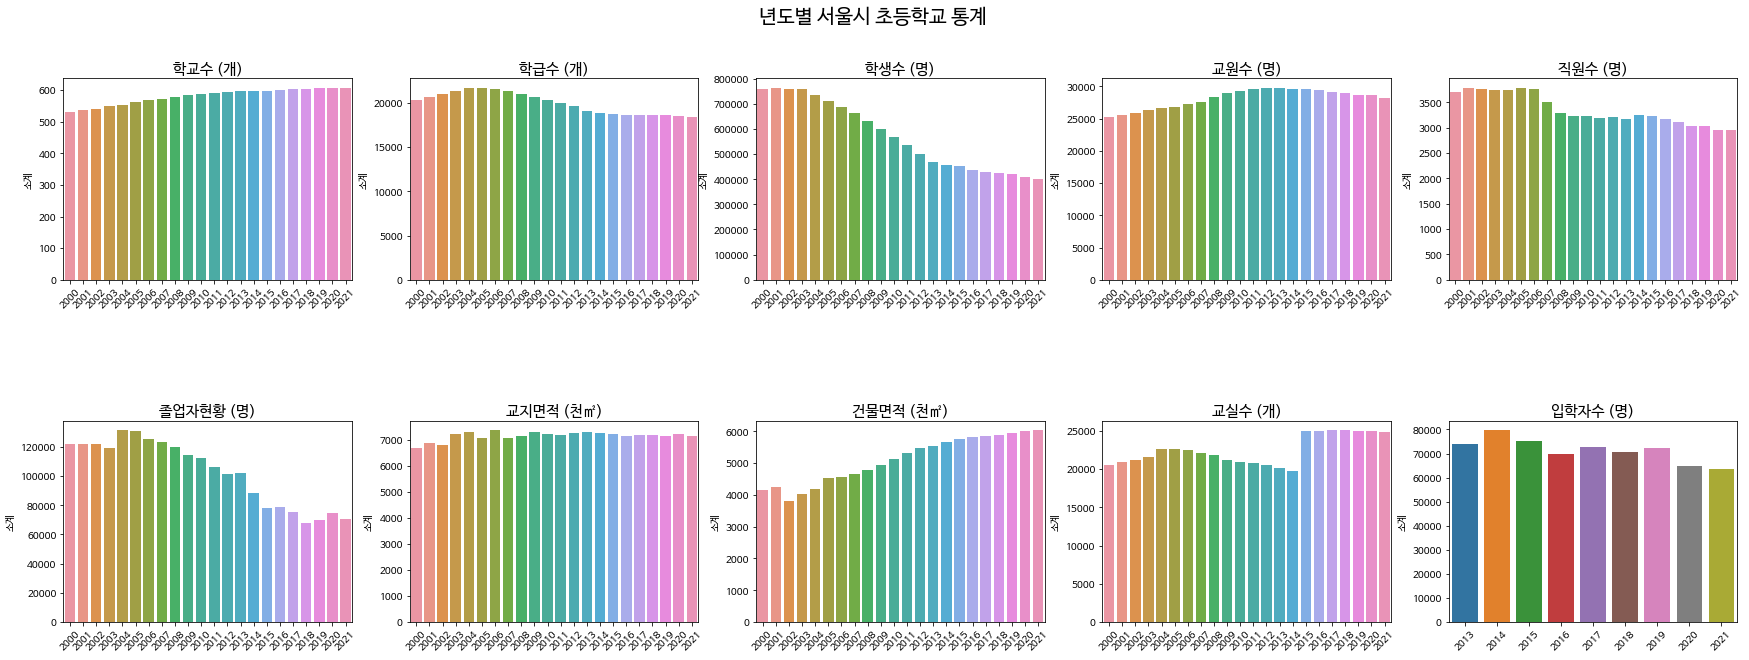

In [54]:
# 년도별 학교수, 학급수, 학생수, 교원수, 직원수, 졸업자현황, 교지면적, 교실수, 입학자수 
student_count = []
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=0.7)
for i in range(len(data['구분1'].unique())):
  plt.subplot(2,5,i+1)
  if i ==5:
    sns.barplot(x=list(data['년'].unique()),y=data[(data['구분1'] == data['구분1'].unique()[i]) & (data['구분2'] == '졸업자수') & (data['구분3'] == '소계')]['소계'].astype(np.int))
  elif i == 9:
    sns.barplot(x=list(data['년'].unique()[13:]),y=data[(data['구분1'] == data['구분1'].unique()[i]) & (data['구분2'] == '소계') & (data['구분3'] == '소계')]['소계'].astype(np.int))
  else:
    sns.barplot(x=list(data['년'].unique()),y=data[(data['구분1'] == data['구분1'].unique()[i]) & (data['구분2'] == '소계') & (data['구분3'] == '소계')]['소계'].astype(np.int))
  
  plt.title(data['구분1'].unique()[i],size=15)
  plt.xticks(rotation=45)

plt.suptitle('년도별 서울시 초등학교 통계',size=20)
plt.show()

- 서울시의 초등학교는 점점 늘어나는 추세이며, 그에 따라 건물면적과 교실수도 증가하는 것으로 보인다.
- 하지만, 학생수가 급격하게 줄어들고 있으며 학급수, 졸업자 수, 직원수는 줄어들고 있다.

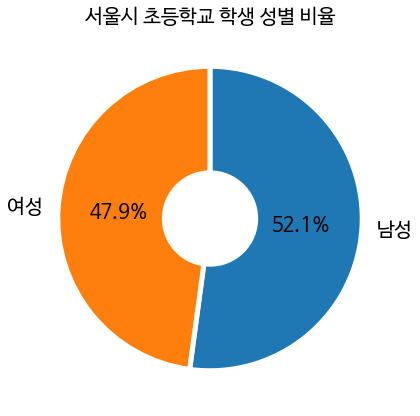

In [80]:
m = data[(data['구분1'] == '학생수 (명)') & (data['구분2'] == '남자')]['소계'].astype(np.int).sum()
w = data[(data['구분1'] == '학생수 (명)') & (data['구분2'] == '여자')]['소계'].astype(np.int).sum()
plt.figure(figsize=(15,7))
plt.pie([m,w],labels = ['남성','여성'],autopct='%.1f%%',startangle=90,counterclock=False,textprops={'fontsize' : 20},wedgeprops=wedgeprops)
plt.title('서울시 초등학교 학생 성별 비율',size=20)
plt.show()

- 학생의 성별 비율은 남성이 52.1%로 여성보다 조금 더 많았다.

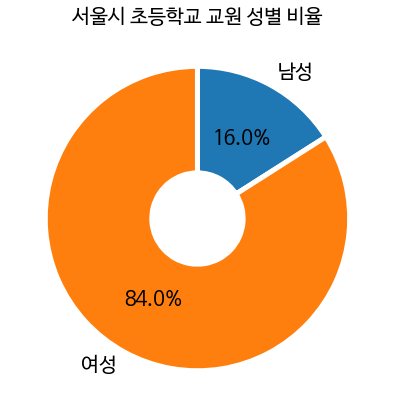

In [81]:
m = data[(data['구분1'] == '교원수 (명)') & (data['구분2'] == '남자')]['소계'].astype(np.int).sum()
w = data[(data['구분1'] == '교원수 (명)') & (data['구분2'] == '여자')]['소계'].astype(np.int).sum()
plt.figure(figsize=(15,7))
plt.pie([m,w],labels = ['남성','여성'],autopct='%.1f%%',startangle=90,counterclock=False,textprops={'fontsize' : 20},wedgeprops=wedgeprops)
plt.title('서울시 초등학교 교원 성별 비율',size=20)
plt.show()

- 초등학교 교원의 성별은 여성이 84%로 남성보다 월등히 많았다.

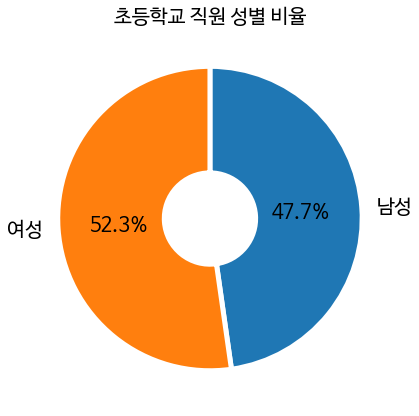

In [82]:
m = data[(data['구분1'] == '직원수 (명)') & (data['구분2'] == '남자')]['소계'].astype(np.int).sum()
w = data[(data['구분1'] == '직원수 (명)') & (data['구분2'] == '여자')]['소계'].astype(np.int).sum()
plt.figure(figsize=(15,7))
plt.pie([m,w],labels = ['남성','여성'],autopct='%.1f%%',startangle=90,counterclock=False,textprops={'fontsize' : 20},wedgeprops=wedgeprops)
plt.title('초등학교 직원 성별 비율',size=20)
plt.show()

- 초등학교 직원의 성별은 여성이 52.3%로 남성보다 조금 많았다.

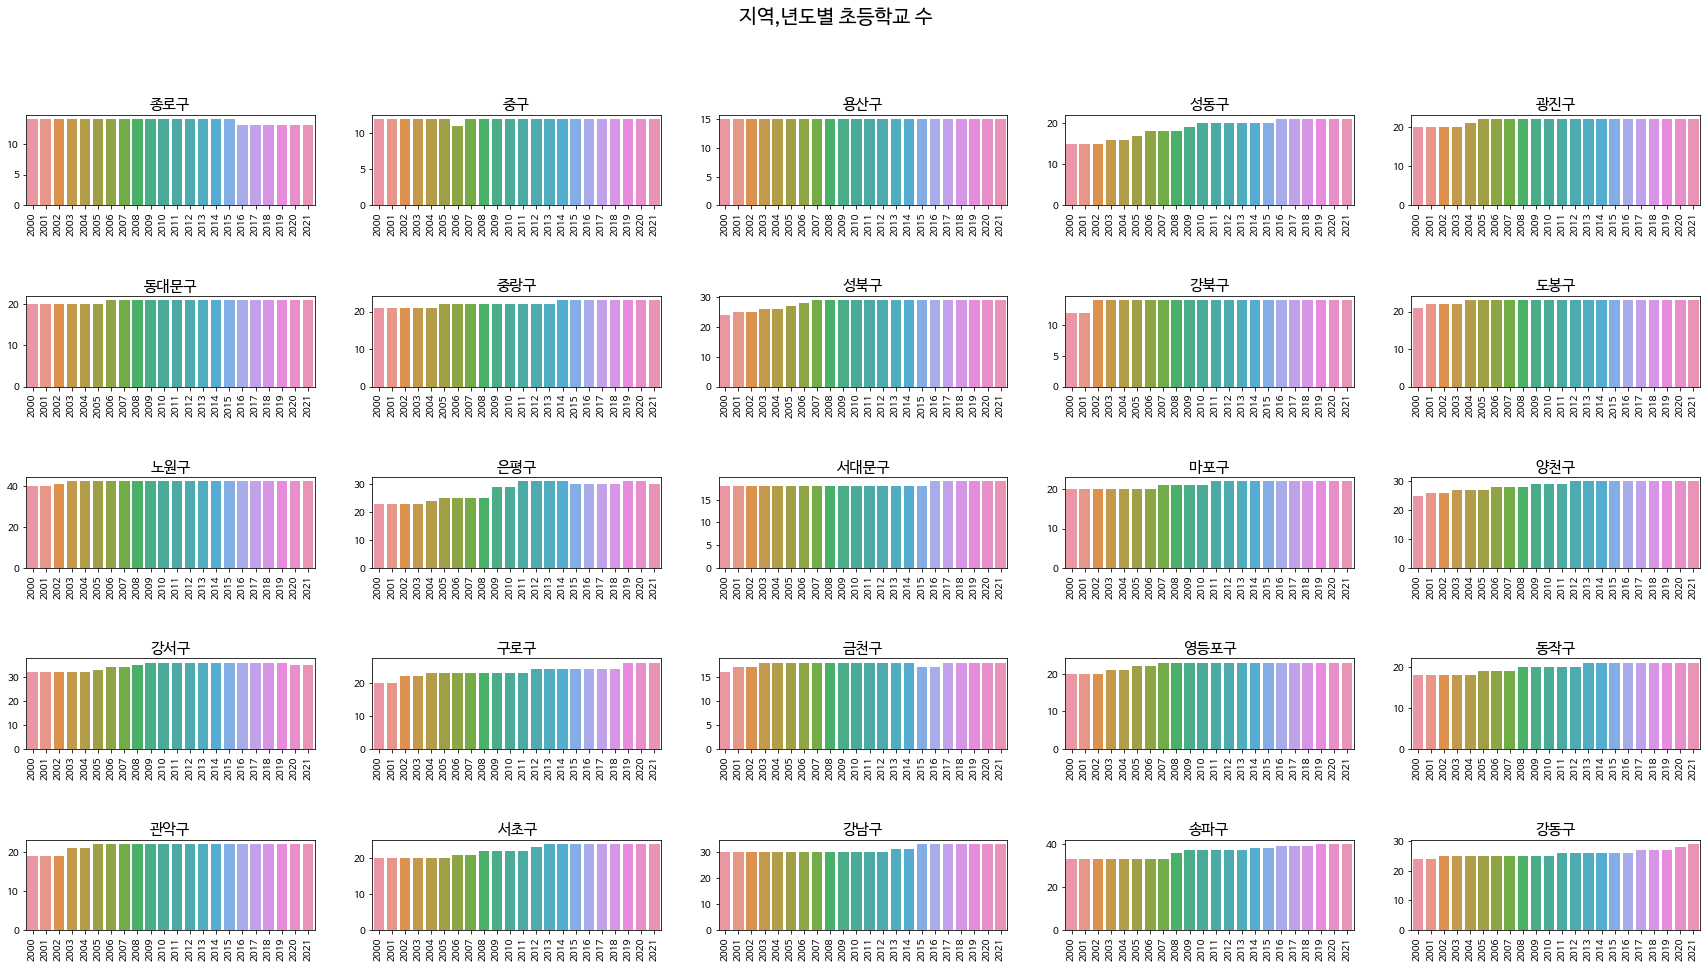

In [110]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=1)
for i in range(len(data.columns[5:])):
  plt.subplot(5,5,i+1)
  sns.barplot(x=list(data['년'].unique()),y=data[(data['구분1'] == '학교수 (개)') & (data['구분3'] == '소계')].iloc[:,5+i].values.astype(np.int))

  plt.title(data.columns[5+i],size=15)
  plt.xticks(rotation=90)

plt.suptitle('지역,년도별 초등학교 수',size=20)
plt.show()

- 전체적으로 초등학교 수는 유지되거나 늘어나고 있는 추세이다.

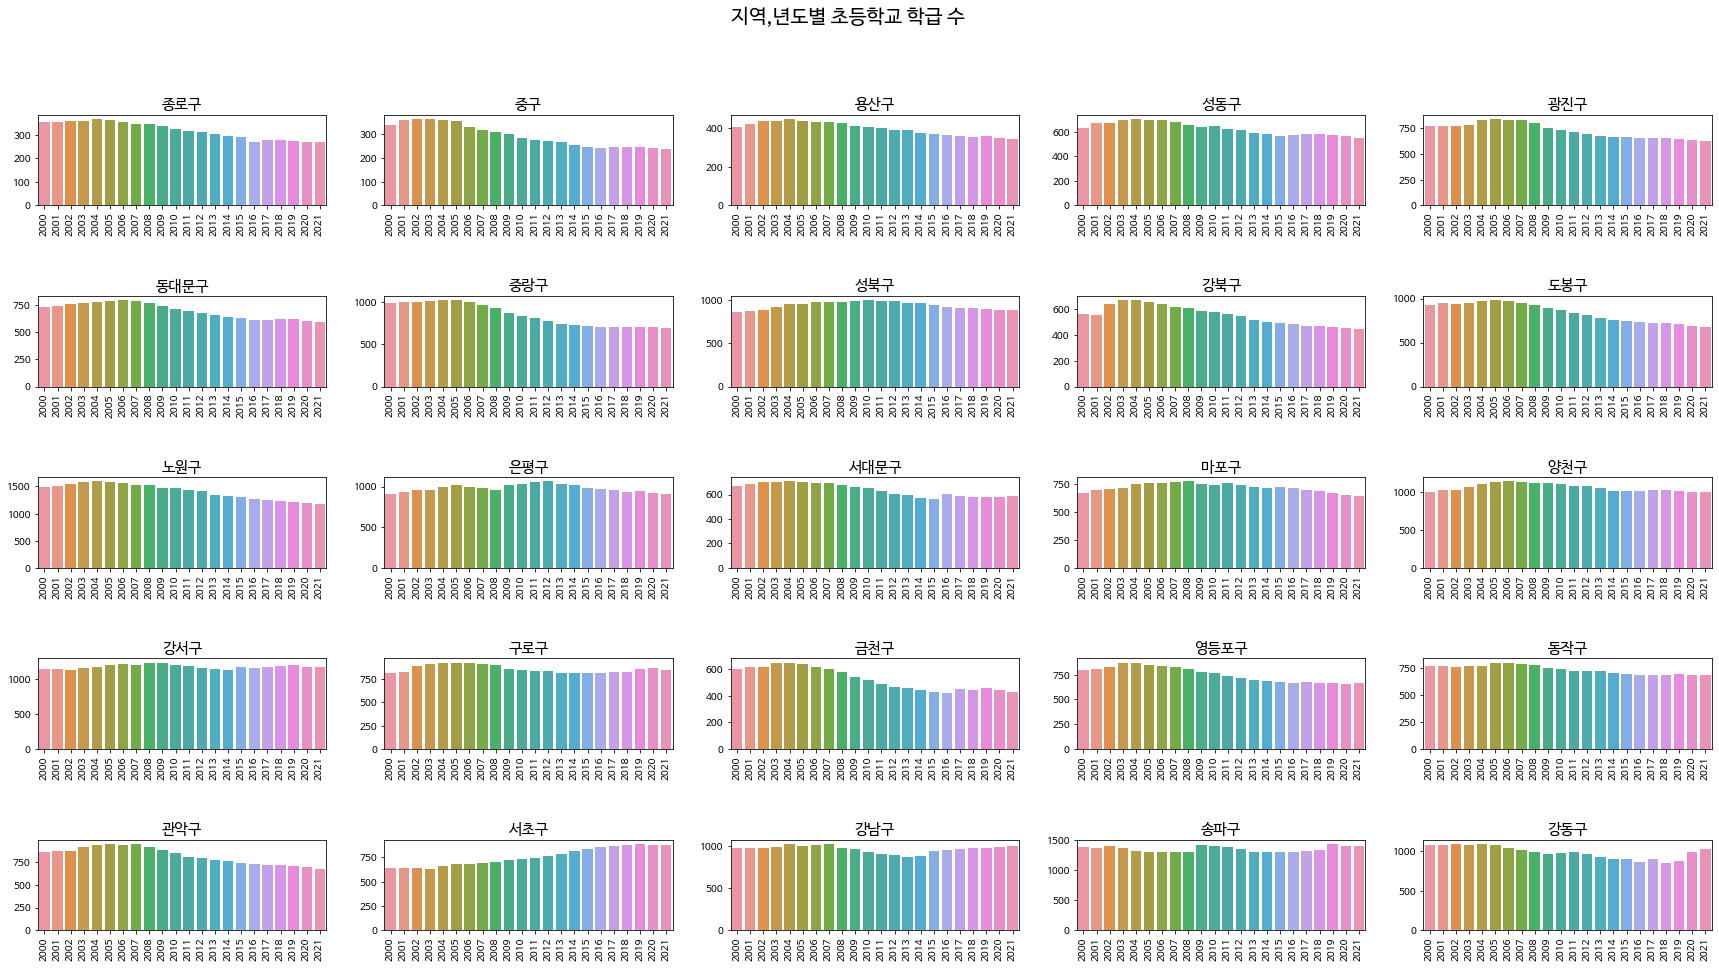

In [111]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=1)
for i in range(len(data.columns[5:])):
  plt.subplot(5,5,i+1)
  sns.barplot(x=list(data['년'].unique()),y=data[(data['구분1'] == '학급수 (개)') & (data['구분3'] == '소계')].iloc[:,5+i].values.astype(np.int))

  plt.title(data.columns[5+i],size=15)
  plt.xticks(rotation=90)

plt.suptitle('지역,년도별 초등학교 학급 수',size=20)
plt.show()

- 초등학교 학급 수는 전체적으로 줄어들고 있지만, 서초구에서는 늘어나고 있다.

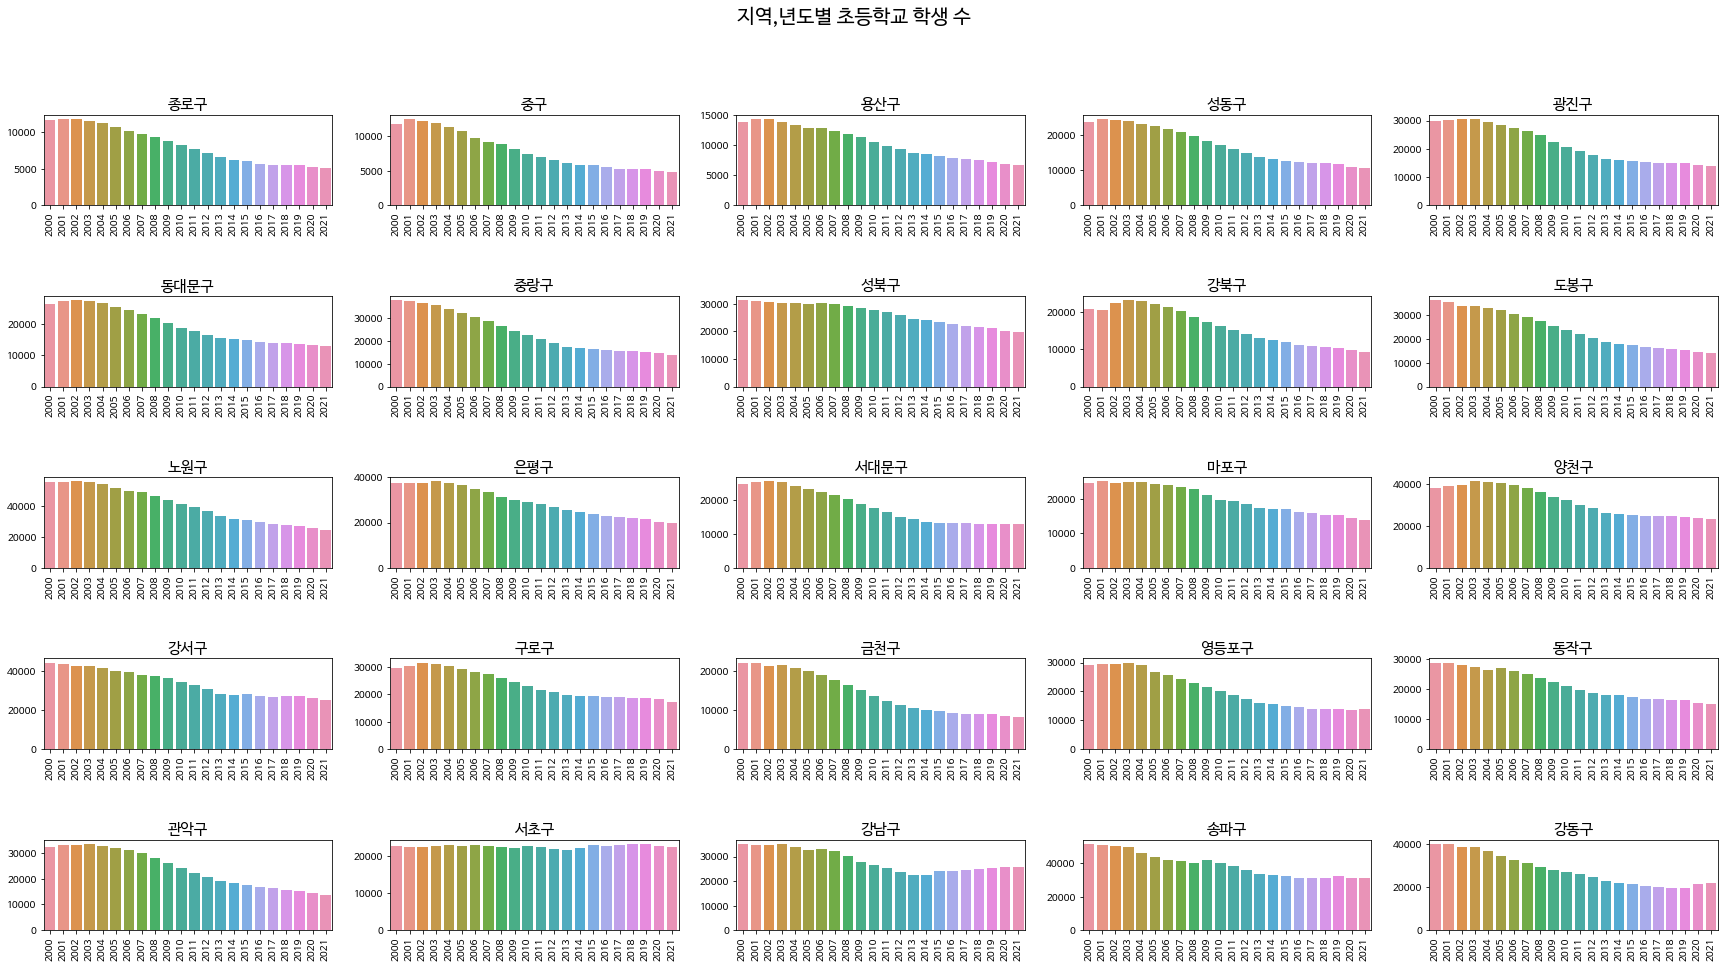

In [119]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=1)
for i in range(len(data.columns[5:])):
  plt.subplot(5,5,i+1)
  sns.barplot(x=list(data['년'].unique()),y=data[(data['구분1'] == '학생수 (명)') & (data['구분2'] == '소계')].iloc[:,5+i].values.astype(np.int))

  plt.title(data.columns[5+i],size=15)
  plt.xticks(rotation=90)

plt.suptitle('지역,년도별 초등학교 학생 수',size=20)
plt.show()

- 초등학교 학생 수는 유일하게 서초구만 학생 수를 유지하고 있으며, 그 외의 모든 지역에서는 급격하게 줄어들고 있다.

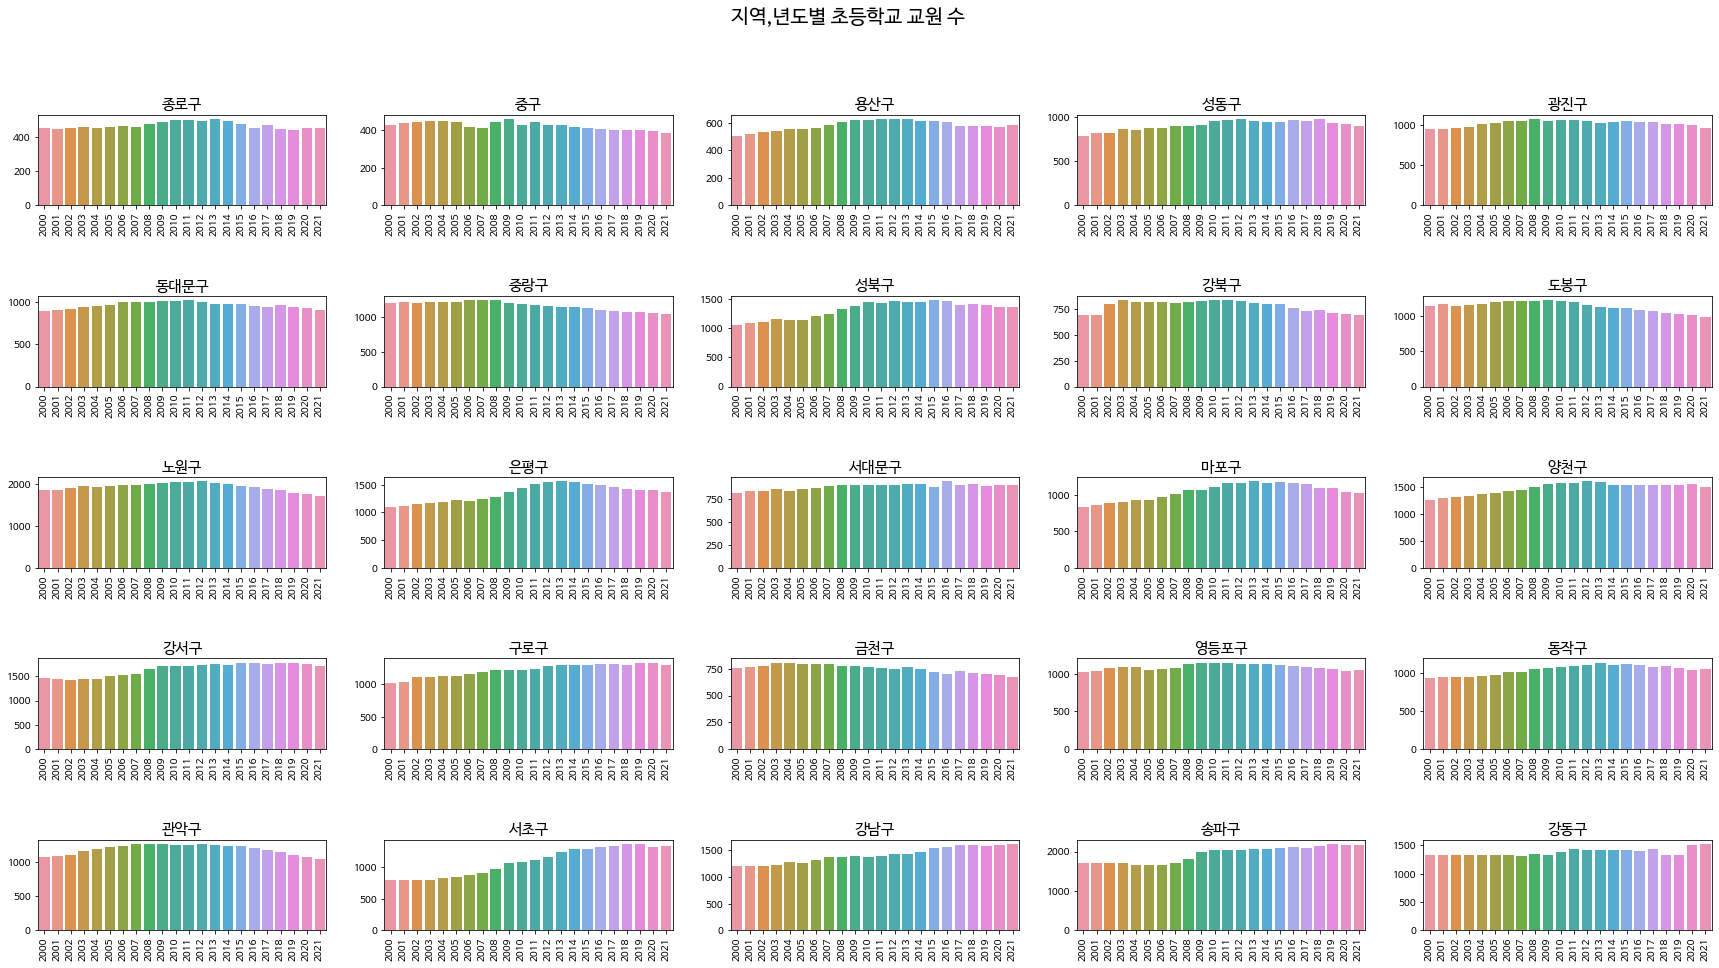

In [121]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=1)
for i in range(len(data.columns[5:])):
  plt.subplot(5,5,i+1)
  sns.barplot(x=list(data['년'].unique()),y=data[(data['구분1'] == '교원수 (명)') & (data['구분2'] == '소계')].iloc[:,5+i].values.astype(np.int))

  plt.title(data.columns[5+i],size=15)
  plt.xticks(rotation=90)

plt.suptitle('지역,년도별 초등학교 교원 수',size=20)
plt.show()

- 학생수는 줄어들고 있지만, 교원수는 늘어나고 있다.

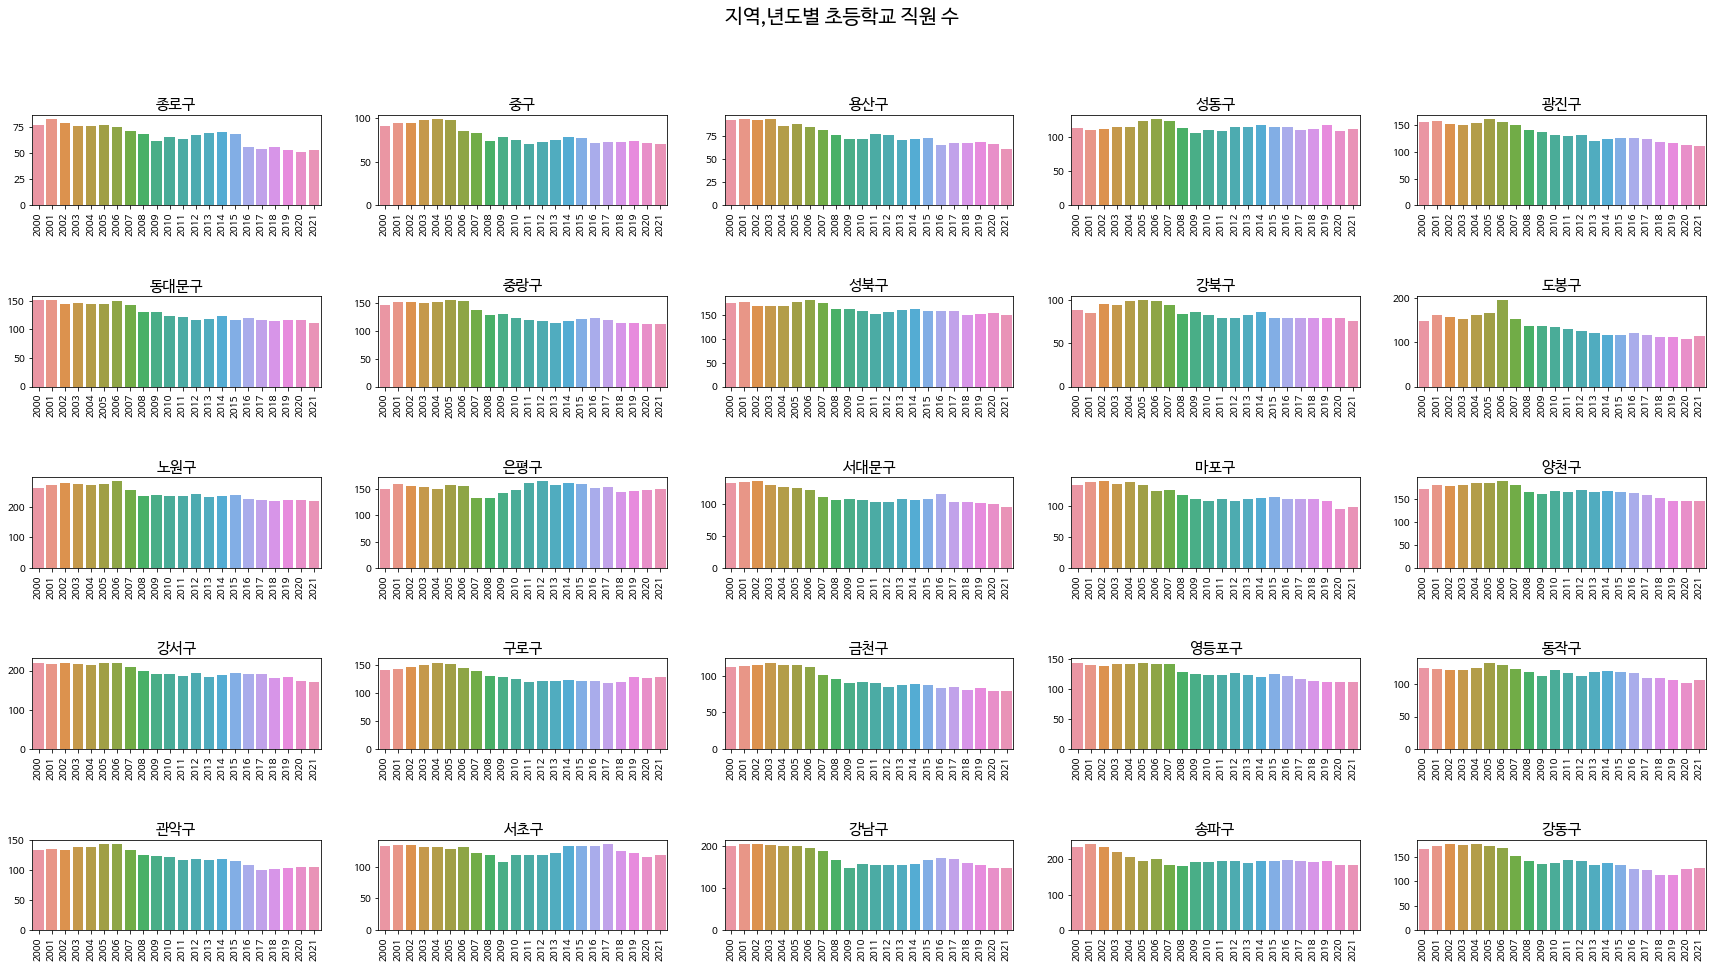

In [122]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=1)
for i in range(len(data.columns[5:])):
  plt.subplot(5,5,i+1)
  sns.barplot(x=list(data['년'].unique()),y=data[(data['구분1'] == '직원수 (명)') & (data['구분2'] == '소계')].iloc[:,5+i].values.astype(np.int))

  plt.title(data.columns[5+i],size=15)
  plt.xticks(rotation=90)

plt.suptitle('지역,년도별 초등학교 직원 수',size=20)
plt.show()

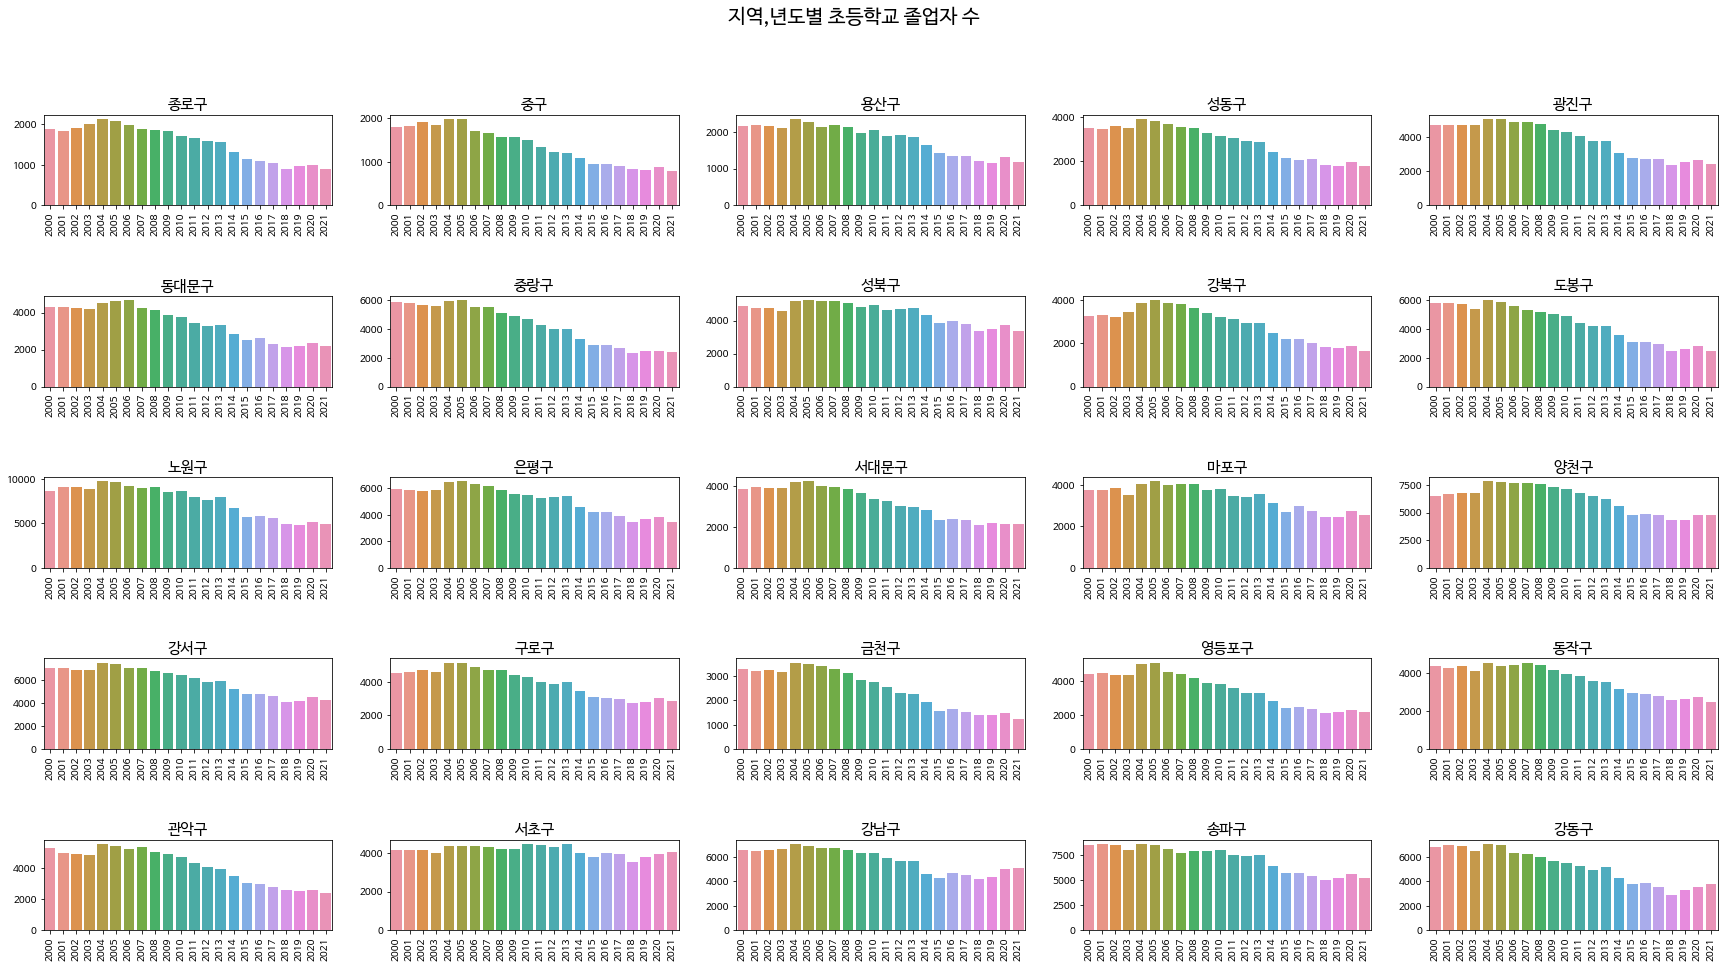

In [123]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=1)
for i in range(len(data.columns[5:])):
  plt.subplot(5,5,i+1)
  sns.barplot(x=list(data['년'].unique()),y=data[(data['구분1'] == '졸업자현황 (명)') & (data['구분2'] == '졸업자수')  & (data['구분3'] == '소계')].iloc[:,5+i].values.astype(np.int))

  plt.title(data.columns[5+i],size=15)
  plt.xticks(rotation=90)

plt.suptitle('지역,년도별 초등학교 졸업자 수',size=20)
plt.show()

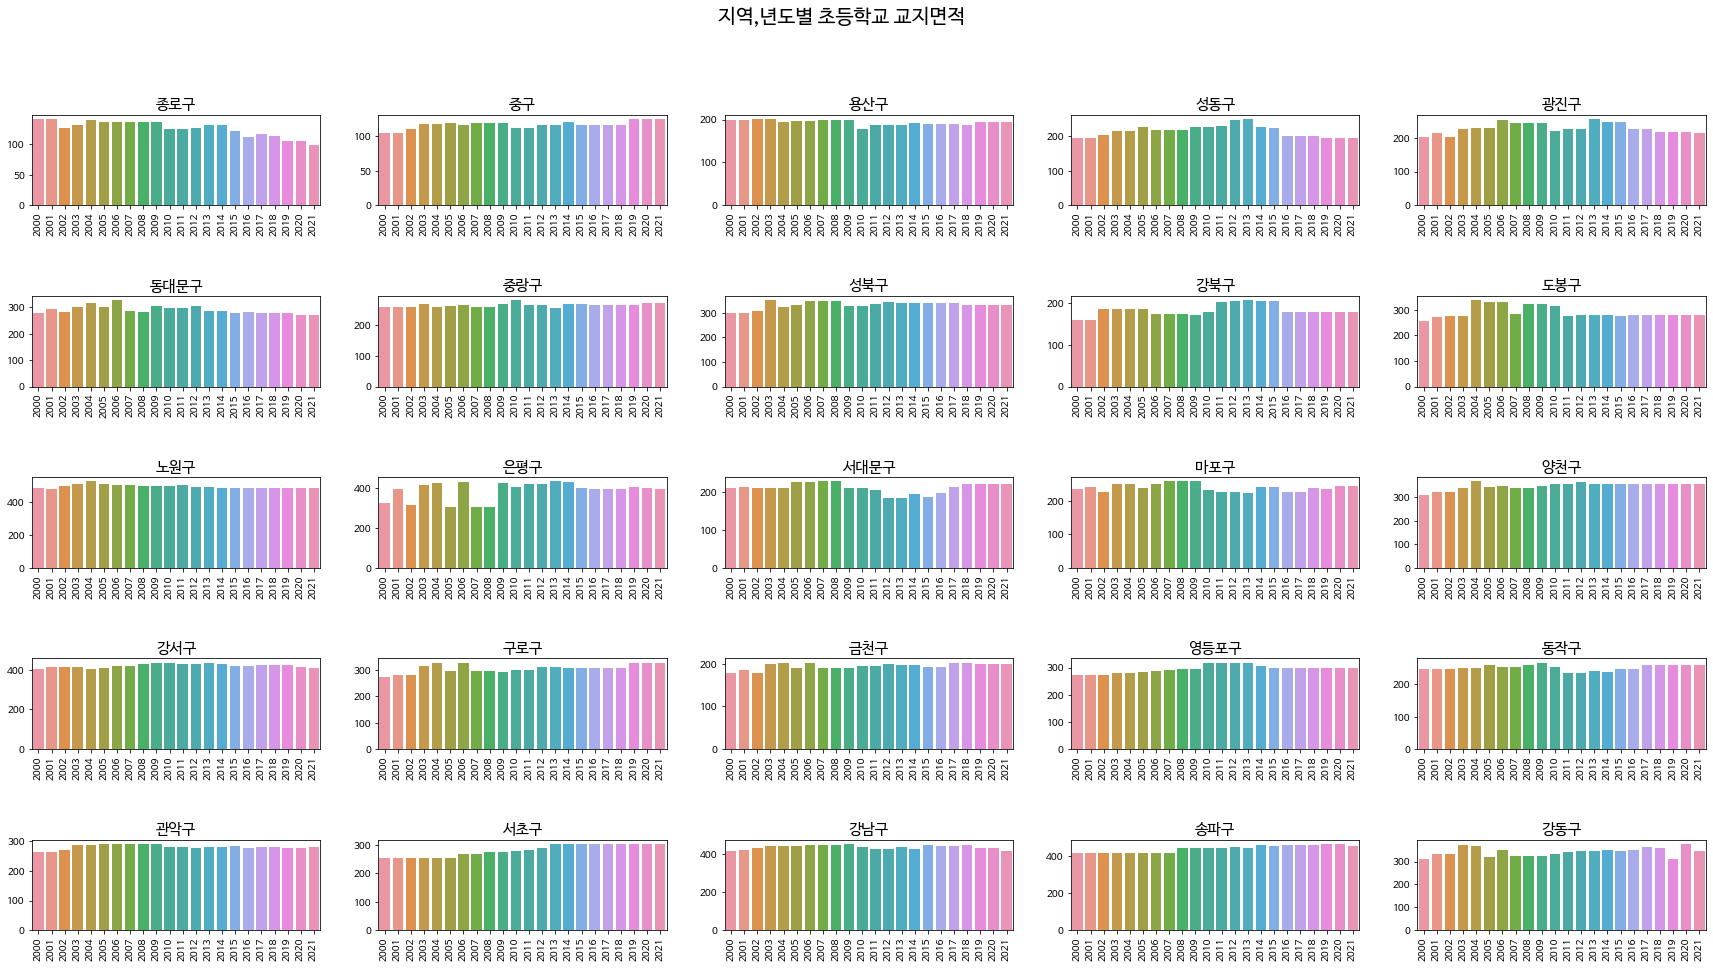

In [124]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=1)
for i in range(len(data.columns[5:])):
  plt.subplot(5,5,i+1)
  sns.barplot(x=list(data['년'].unique()),y=data[(data['구분1'] == '교지면적 (천㎡)') & (data['구분3'] == '소계')].iloc[:,5+i].values.astype(np.int))

  plt.title(data.columns[5+i],size=15)
  plt.xticks(rotation=90)

plt.suptitle('지역,년도별 초등학교 교지면적',size=20)
plt.show()

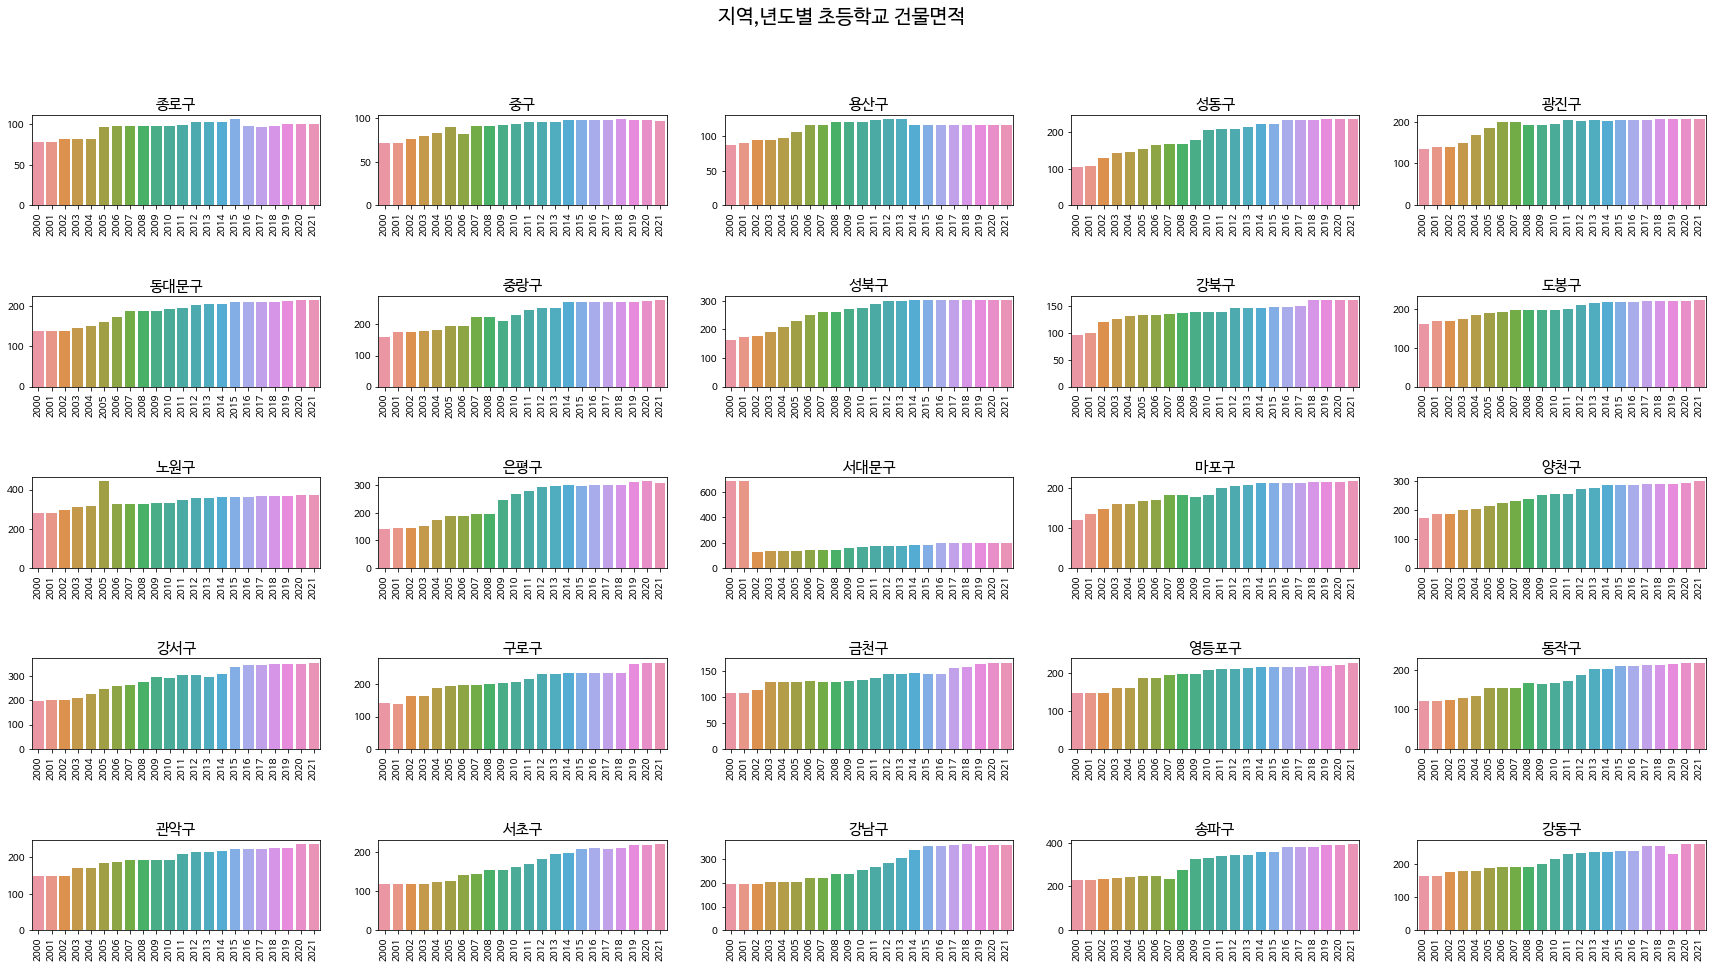

In [125]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=1)
for i in range(len(data.columns[5:])):
  plt.subplot(5,5,i+1)
  sns.barplot(x=list(data['년'].unique()),y=data[(data['구분1'] == '건물면적 (천㎡)') & (data['구분3'] == '소계')].iloc[:,5+i].values.astype(np.int))

  plt.title(data.columns[5+i],size=15)
  plt.xticks(rotation=90)

plt.suptitle('지역,년도별 초등학교 건물면적',size=20)
plt.show()